In [1]:
import QUANTAXIS as QA


QUANTAXIS>> start QUANTAXIS
QUANTAXIS>> Welcome to QUANTAXIS, the Version is 1.0.68
QUANTAXIS>>  
 ```````````````````````````````````````````````````````````````````````````````````````````````````````````````````````` 
  ``########`````##````````##``````````##`````````####````````##```##########````````#``````##``````###```##`````######`` 
  `##``````## ```##````````##`````````####````````##`##```````##```````##```````````###``````##````##`````##```##`````##` 
  ##````````##```##````````##````````##`##````````##``##``````##```````##``````````####```````#```##``````##```##``````## 
  ##````````##```##````````##```````##```##```````##```##`````##```````##`````````##`##```````##`##```````##````##``````` 
  ##````````##```##````````##``````##`````##``````##````##````##```````##````````##``###```````###````````##`````##`````` 
  ##````````##```##````````##``````##``````##`````##`````##```##```````##```````##````##```````###````````##``````###```` 
  ##````````##```##````````##`````##`````

pip install QUANTAXIS == 1.0.36 请升级QUANTAXIS后再运行此示例


# QUANTAXIS 回测的一些基础知识

 * 交易员交易账号，每个账号可以有多个投资组合，每个组合有几个策略。不过这些都需要执行
 

##  QA回测的核心是两个类

```
QA_BacktestBroker

QA_Account
    User-->Portfolio-->Account/Strategy
```

In [14]:
QA.QA_BacktestBroker?

##  回测数据的引入/迭代

```
QA.QA_fetch_stock_day_adv
QA.QA_fetch_stock_min_adv
```

In [12]:
QA.QA_fetch_stock_day_adv?



##  指标的计算

```
DataStruct.add_func
```


##  对于账户的灵活运用

```
QA_Account
QA_Risk
QA_Portfolio
QA_PortfolioView
QA_User
```

## STEP1 初始化账户,初始化回测broker

In [16]:
Account=QA.QA_Account()
Broker=QA.QA_BacktestBroker()

F:\app\anaconda\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: QUANTAXIS 1.0.46 has changed the init_assets ==> init_cash, please pay attention to this change if you using init_cash to initial an account class,                
  """Entry point for launching an IPython kernel.


In [18]:
# 打印账户的信息
try:
    from pprint import  pprint as print
except:
    pass
print(Account.message)

{'account_cookie': 'Acc_yCbwQnRd',
 'allow_sellopen': False,
 'allow_t0': False,
 'broker': 'backtest',
 'cash': [1000000],
 'commission_coeff': 0.00025,
 'current_time': 'None',
 'history': [],
 'init_assets': {'cash': 1000000, 'hold': {}},
 'margin_level': False,
 'market_type': 'stock_cn',
 'portfolio_cookie': None,
 'quantaxis_version': '1.0.68',
 'running_environment': 'backtest',
 'running_time': '2018-08-20 20:58:26.721199',
 'source': 'account',
 'strategy_name': None,
 'tax_coeff': 0.0015,
 'trade_index': [],
 'user_cookie': None}


## 首先讲解Account类:

QA_Account在初始化的时候,可以自己指定很多信息:

```
QA_Account(strategy_name=None, user_cookie=None, market_type=MARKET_TYPE.STOCK_CN, frequence=FREQUENCE.DAY,
                 broker=BROKER_TYPE.BACKETEST, portfolio_cookie=None, account_cookie=None,
                 sell_available={}, init_assets=None, cash=None, history=None, commission_coeff=0.00025, tax_coeff=0.0015,
                 margin_level=False, allow_t0=False, allow_sellopen=False)
                 
        :param strategy_name:  策略名称
        :param user_cookie:   用户cookie
        :param market_type:   市场类别 默认QA.MARKET_TYPE.STOCK_CN A股股票
        :param frequence:     账户级别 默认日线QA.FREQUENCE.DAY
        :param broker:        BROEKR类 默认回测 QA.BROKER_TYPE.BACKTEST
        :param portfolio_cookie: 组合cookie
        :param account_cookie:   账户cookie
        :param sell_available:   可卖股票数
        :param init_assets:       初始资产  默认 1000000 元 （100万）
        :param cash:              可用现金  默认 是 初始资产  list 类型
        :param history:           交易历史
        :param commission_coeff:  交易佣金 :默认 万2.5   float 类型
        :param tax_coeff:         印花税   :默认 千1.5   float 类型
        :param margin_level:      保证金比例 默认False
        :param allow_t0:          是否允许t+0交易  默认False
        :param allow_sellopen:    是否允许卖空开仓  默认False
```

In [22]:
Account??

In [24]:
# 重设账户初始资金

Account.reset_assets(200000)
Account.account_cookie='JCSC_EXAMPLE'

In [25]:
Account.init_assets

{'cash': 200000, 'hold': {}}

Account 有很多方法,暂时不详细展开,我们先直接进入下一步

# SETP2:引入回测的市场数据

引入方法非常简单,直接使用QA_fetch_stock_day_adv系列即可

- code 可以是多种多样的选取方式

```python
1. QA.QA_fetch_stock_list_adv().code.tolist() # 获取全市场的股票代码
2. QA.QA_fetch_stock_block_adv().get_block('云计算').code  # 按版块选取
3. code= ['000001','000002'] # 自己指定
```
- 数据获取后,to_qfq() 即可获得前复权数据

```python
data=DataSturct.to_qfq()
```

In [38]:
symbols=QA.QA_fetch_stock_list_adv()

In [40]:
symbols=QA.QA_fetch_stock_list_adv()#.code.tolist()
blocks=QA.QA_fetch_stock_block_adv().get_block('云计算')


In [43]:
data=QA.QA_fetch_stock_day_adv(['000001','000002'],'2017-09-01','2018-05-20')

In [44]:
data=data.to_qfq()

In [48]:
data.data.head()

open   high    low  close     volume        amount  \
date       code                                                          
2017-09-01 000001  11.28  11.39  11.15  11.21   959976.0  1.080996e+09   
           000002  23.26  23.37  22.74  22.88   407080.0  9.337101e+08   
2017-09-04 000001  11.18  11.72  11.17  11.72  1352325.0  1.551875e+09   
           000002  22.90  23.04  22.69  22.96   268283.0  6.147276e+08   
2017-09-05 000001  11.68  11.94  11.60  11.64  1287518.0  1.513759e+09   

                   preclose  adj  
date       code                   
2017-09-01 000001       NaN  1.0  
           000002       NaN  1.0  
2017-09-04 000001     11.21  1.0  
           000002     22.88  1.0  
2017-09-05 000001     11.72  1.0

## STEP3:计算一些指标

指标的计算可以在回测前,也可以在回测中进行

回测前的计算则是批量计算,效率较高

回测中的计算,效率略低,但代码量较小,易于理解

PS: 指标的相关介绍参见 [QUANTAXIS的指标系统](https://github.com/QUANTAXIS/QUANTAXIS/blob/master/Documents/indicators.md)

In [52]:
import numpy as np
import pandas as pd
def MACD_JCSC(dataframe,SHORT=12,LONG=26,M=9):
    """
    1.DIF向上突破DEA，买入信号参考。
    2.DIF向下跌破DEA，卖出信号参考。
    """
    CLOSE=dataframe.close
    DIFF =QA.EMA(CLOSE,SHORT) - QA.EMA(CLOSE,LONG)
    DEA = QA.EMA(DIFF,M)
    MACD =2*(DIFF-DEA)

    CROSS_JC=QA.CROSS(DIFF,DEA)
    CROSS_SC=QA.CROSS(DEA,DIFF)
    ZERO=0
    return pd.DataFrame({'DIFF':DIFF,'DEA':DEA,'MACD':MACD,'CROSS_JC':CROSS_JC,'CROSS_SC':CROSS_SC,'ZERO':ZERO})

In [53]:
ind=data.add_func(MACD_JCSC)

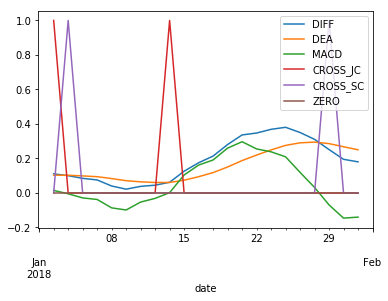

In [18]:
ind.xs('000001',level=1)['2018-01'].plot()

In [63]:
ind.loc['2018-01']

DIFF       DEA      MACD  CROSS_JC  CROSS_SC  ZERO
date       code                                                          
2018-01-02 000001  0.110686  0.103225  0.014921         1         0     0
           000002  0.404554  0.189272  0.430564         0         0     0
2018-01-03 000001  0.100387  0.102657 -0.004541         0         1     0
           000002  0.511649  0.253747  0.515803         0         0     0
2018-01-04 000001  0.084801  0.099086 -0.028570         0         0     0
           000002  0.652650  0.333528  0.638244         0         0     0
2018-01-05 000001  0.075607  0.094390 -0.037566         0         0     0
           000002  0.886331  0.444089  0.884484         0         0     0
2018-01-08 000001  0.040453  0.083603 -0.086299         0         0     0
           000002  1.157306  0.586732  1.141148         0         0     0
2018-01-09 000001  0.022012  0.071285 -0.098545         0         0     0
           000002  1.344462  0.738278  1.212368         0         0     0
2018-01-10 000001  0.038391  0.064706 -0.052629         0         0     0
           000002  1.462222  0.883067  1.158309         0         0     0
2018-01-11 000001  0.045208  0.060806 -0.031197         0         0     0
           000002  1.496376  1.005729  0.981293         0         0     0
2018-01-12 000001  0.061988  0.061043  0.001890         1         0     0
           000002  1.537958  1.112175  0.851567         0         0     0
2018-01-15 000001  0.126236  0.074081  0.104309         0         0     0
           000002  1.675753  1.224891  0.901726         0         0     0
2018-01-16 000001  0.175134  0.094292  0.161683         0         0     0
           000002  2.012509  1.382414  1.260190         0         0     0
2018-01-17 000001  0.213839  0.118201  0.191275         0         0     0
           000002  2.219133  1.549758  1.338749         0         0     0
2018-01-18 000001  0.280788  0.150718  0.260139         0         0     0
           000002  2.354926  1.710792  1.288269         0         0     0
2018-01-19 000001  0.336418  0.187858  0.297119         0         0     0
           000002  2.407371  1.850108  1.114527         0         0     0
2018-01-22 000001  0.347467  0.219780  0.255374         0         0     0
           000002  2.429793  1.966045  0.927497         0         0     0
2018-01-23 000001  0.368907  0.249605  0.238603         0         0     0
           000002  2.535276  2.079891  0.910770         0         0     0
2018-01-24 000001  0.380702  0.275825  0.209755         0         0     0
           000002  2.600984  2.184110  0.833749         0         0     0
2018-01-25 000001  0.350521  0.290764  0.119515         0         0     0
           000002  2.548667  2.257021  0.583292         0         0     0
2018-01-26 000001  0.310920  0.294795  0.032249         0         0     0
           000002  2.465873  2.298792  0.334164         0         0     0
2018-01-29 000001  0.251630  0.286162 -0.069064         0         1     0
           000002  2.255685  2.290170 -0.068970         0         1     0
2018-01-30 000001  0.195134  0.267957 -0.145646         0         0     0
           000002  1.889068  2.209950 -0.641763         0         0     0
2018-01-31 000001  0.180544  0.250474 -0.139859         0         0     0
           000002  1.676000  2.103160 -0.854320         0         0     0

# SETP4:选取回测的开始和结束日期,构建回测

In [89]:
items.data

open   high    low  close     volume        amount  \
date       code                                                          
2018-04-27 000001  11.49  11.51  10.63  10.85  2709795.0  2.958464e+09   
           000002  28.66  28.75  27.42  28.40   381958.0  1.071392e+09   

                   preclose  adj  
date       code                   
2018-04-27 000001     11.42  1.0  
           000002     28.50  1.0

In [94]:
item.data

,,open,high,low,close,volume,amount,preclose,adj
date,code,,,,,,,,
2018-04-27,000002,28.66,28.75,27.42,28.4,381958.0,1.071392e+09,28.5,1.0


In [101]:
daily_ind=ind.loc[item.index]
daily_ind.CROSS_JC.iloc[0]

0

In [105]:
Account.send_order?

In [106]:
Account.receive_deal?

In [83]:
data_forbacktest=data.select_time('2018-01-01','2018-05-01')


for items in data_forbacktest.panel_gen:
    #返回基于bar的迭代器
    for item in items.security_gen:
        #返回基于股票的迭代器
        daily_ind=ind.loc[item.index]#获取股票和该日期的数据
        
        if daily_ind.CROSS_JC.iloc[0]>0:
            #如果上穿，账号就发信号
            order=Account.send_order( code=item.code[0],time=item.date[0], amount=1000, towards=QA.ORDER_DIRECTION.BUY,
                                     price=0, order_model=QA.ORDER_MODEL.CLOSE,amount_model=QA.AMOUNT_MODEL.BY_AMOUNT)
            #把当日数据和当天的命令发送到交易员，交易员交易后把交易结果返回给账号用于更新账号信息
            Account.receive_deal(Broker.receive_order(QA.QA_Event(order=order,market_data=item)))
            #有没有长期命令，比如一天来着。
        elif daily_ind.CROSS_SC.iloc[0]>0:
            
            if Account.sell_available.get(item.code[0], 0)>0:
                
                order=Account.send_order(
                    code=item.code[0], time=item.date[0],  amount=Account.sell_available.get(item.code[0], 0), 
                    towards=QA.ORDER_DIRECTION.SELL,  price=0,  order_model=QA.ORDER_MODEL.MARKET, 
                    amount_model=QA.AMOUNT_MODEL.BY_AMOUNT   )
                
                Account.receive_deal(Broker.receive_order(QA.QA_Event(order=order,market_data=item)))
    #每日更新股票数据
    Account.settle()
            

In [110]:
Account.sell_available.get('000001')

1000.0

## STEP5: 分析账户

In [121]:
Account.cash_available

182131.04374999995

In [46]:
Account.history_table

,datetime,code,price,amount,cash,order_id,trade_id,account_cookie,commission,tax
0,2018-01-02 15:00:00,000001,13.70,1000.0,186295.00000,Order_mecP2gwd,Trade_rO4XiQp6,JCSC_EXAMPLE,5.00000,0.0000
1,2018-01-03 09:30:00,000001,13.53,-1000.0,199799.70500,Order_xlqTiKFw,Trade_SE5g8Uiy,JCSC_EXAMPLE,5.00000,20.2950
2,2018-01-04 15:00:00,600000,12.66,1000.0,187134.70500,Order_C4JMiZvw,Trade_R32rxwWb,JCSC_EXAMPLE,5.00000,0.0000
3,2018-01-12 15:00:00,000001,13.55,1000.0,173579.70500,Order_MZpJOLfy,Trade_BNXcw5Km,JCSC_EXAMPLE,5.00000,0.0000
4,2018-01-24 15:00:00,000004,22.08,1000.0,151494.18500,Order_FHkAM8pP,Trade_wysUkov3,JCSC_EXAMPLE,5.52000,0.0000
5,2018-01-29 09:30:00,000001,13.93,-1000.0,165398.29750,Order_px1o2K74,Trade_z4iZ1bt3,JCSC_EXAMPLE,5.00000,20.8875
6,2018-01-31 09:30:00,000004,20.73,-1000.0,186092.01125,Order_eVpZUQD5,Trade_McEI0GT4,JCSC_EXAMPLE,5.18375,31.1025
7,2018-02-02 09:30:00,600000,13.10,-1000.0,199167.36125,Order_9oOKdTle,Trade_WqSiBsfP,JCSC_EXAMPLE,5.00000,19.6500
8,2018-02-05 15:00:00,600000,13.49,1000.0,185672.36125,Order_kqF5S96O,Trade_Zpx10QOq,JCSC_EXAMPLE,5.00000,0.0000
9,2018-02-08 09:30:00,600000,13.18,-1000.0,198827.59875,Order_0DMOaQTo,Trade_RkaTEKsm,JCSC_EXAMPLE,5.00000,19.7625


In [130]:
Account.daily_hold

,code,000001,000002
date,account_cookie,,
2018-01-02,JCSC_EXAMPLE,1000.0,0.0
2018-01-03,JCSC_EXAMPLE,0.0,0.0
2018-01-12,JCSC_EXAMPLE,1000.0,0.0
2018-01-29,JCSC_EXAMPLE,0.0,0.0
2018-03-08,JCSC_EXAMPLE,1000.0,1000.0
2018-03-19,JCSC_EXAMPLE,1000.0,0.0
2018-03-26,JCSC_EXAMPLE,0.0,0.0
2018-03-29,JCSC_EXAMPLE,0.0,1000.0
2018-04-10,JCSC_EXAMPLE,1000.0,1000.0


In [131]:
Risk=QA.QA_Risk(Account)

In [132]:
Risk.message

{'account_cookie': 'JCSC_EXAMPLE',
 'alpha': 0.13,
 'annualize_return': -0.12,
 'benchmark_code': '000300',
 'beta': 1.0,
 'bm_annualizereturn': -0.25,
 'bn_profit': -0.06,
 'init_cash': '200000.00',
 'last_assets': '193231.04',
 'max_dropback': 0.03,
 'portfolio_cookie': None,
 'profit': -0.03,
 'profit_money': -6768.96,
 'sharpe': -2.12,
 'time_gap': 68,
 'total_commission': -67.56,
 'total_tax': -151.4,
 'user_cookie': None,
 'volatility': 0.08}

In [134]:
Risk.assets

date
2018-01-02    199995.00000
2018-01-03    199799.70500
2018-01-12    199794.70500
2018-01-29    200148.81750
2018-03-08    200135.40750
2018-03-19    198209.32000
2018-03-26    197387.77500
2018-03-29    197379.23500
2018-04-10    195394.23500
2018-04-16    193231.04375
Name: 0, dtype: float64

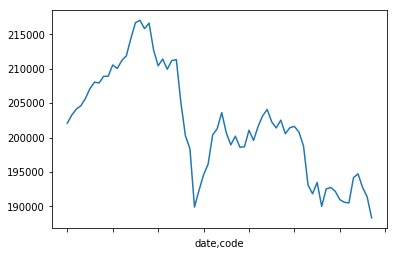

In [137]:
Risk.benchmark_assets.plot()

## STEP6: 存储结果

In [138]:
Account.save()
Risk.save()

In [139]:
ls

 驱动器 G 中的卷是 txt
 卷的序列号是 44CD-0E05

 G:\git\economic\quantaxiss 的目录

2018/08/20  21:25    <DIR>          .
2018/08/20  21:25    <DIR>          ..
2018/08/18  21:29    <DIR>          .ipynb_checkpoints
2018/08/18  21:22         1,333,844 block.csv
2018/08/19  20:11    <DIR>          config
2018/08/18  21:24            28,081 datastruct.png
2018/08/19  20:11    <DIR>          Documents
2018/08/18  21:22             1,475 example.py
2018/08/19  20:11    <DIR>          jupyterexample
2018/08/18  21:22             1,176 QA_Trade_stock_query.py
2018/08/20  21:25           168,110 QUANTAXIS回测分析全过程讲解.ipynb
2018/08/19  20:11    <DIR>          research
2018/08/18  21:24             2,389 update_all.py
2018/08/18  21:24             1,714 update_data.py
2018/08/18  21:24             2,375 update_x.py
2018/08/18  21:24           704,562 wind复权算法.pdf
               9 个文件      2,243,726 字节
               7 个目录 152,216,076,288 可用字节


## STEP7: 查看存储的结果

In [140]:
QA.QA_fetch_account?

In [142]:
account_info=QA.QA_fetch_account({'account_cookie':'JCSC_EXAMPLE'})

In [150]:
account=QA.QA_Account().from_message(account_info[0])

F:\app\anaconda\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: QUANTAXIS 1.0.46 has changed the init_assets ==> init_cash, please pay attention to this change if you using init_cash to initial an account class,                
  """Entry point for launching an IPython kernel.


In [151]:
account

< QA_Account JCSC_EXAMPLE>